# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Trend Report: 
# 1. There is a strong correlation between temperature and latitude. As you move towards the equator, the temperature rises
# 2. Wind speeds tend to decrease as you move towards the equator, though the correlation is less significant than temperature.
# 3. Humidity does not strongly correlate with latitude. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create lists
Lat = []
temp = []
humidity = []
cloudiness = []
wind = []
city_final = []
Lon = []

#Loop through cities
for city in cities[0:50]:
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    date=datetime.datetime.now()
    try:
        Lat.append(response['coord']['lat'])
        Lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_final.append(response['name'])
        print("Print Log:" + (city) + ", Date/Time:" + date.strftime("%m-%d-%Y %H:%M:%S"))
    except Exception:
        print("City not found. Skipping..")
        pass
        

Print Log:provideniya, Date/Time:07-09-2020 22:01:28
Print Log:llanes, Date/Time:07-09-2020 22:01:28
Print Log:ak-dovurak, Date/Time:07-09-2020 22:01:30
City not found. Skipping..
Print Log:rikitea, Date/Time:07-09-2020 22:01:32
Print Log:qaanaaq, Date/Time:07-09-2020 22:01:33
Print Log:talnakh, Date/Time:07-09-2020 22:01:34
Print Log:campo largo, Date/Time:07-09-2020 22:01:35
Print Log:mataura, Date/Time:07-09-2020 22:01:36
City not found. Skipping..
Print Log:saldanha, Date/Time:07-09-2020 22:01:37
Print Log:barrow, Date/Time:07-09-2020 22:01:38
Print Log:hermanus, Date/Time:07-09-2020 22:01:38
Print Log:khatanga, Date/Time:07-09-2020 22:01:39
Print Log:tomatlan, Date/Time:07-09-2020 22:01:40
Print Log:bakel, Date/Time:07-09-2020 22:01:40
Print Log:kiunga, Date/Time:07-09-2020 22:01:41
Print Log:acapulco, Date/Time:07-09-2020 22:01:42
City not found. Skipping..
Print Log:bluff, Date/Time:07-09-2020 22:01:44
Print Log:kapaa, Date/Time:07-09-2020 22:01:45
City not found. Skipping..
Pri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_final,
    "Lat": Lat,
    "Lon": Lon,
    "Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed (mph)": wind
}

weather_dict

{'City': ['Provideniya',
  'Llanes',
  'Ak-Dovurak',
  'Rikitea',
  'Qaanaaq',
  'Talnakh',
  'Campo Largo',
  'Mataura',
  'Saldanha',
  'Barrow',
  'Hermanus',
  'Khatanga',
  'Tomatlán',
  'Bakel',
  'Kiunga',
  'Acapulco de Juárez',
  'Bluff',
  'Kapaa',
  'Cayenne',
  'Hilo',
  'Puerto Escondido',
  'Deputatsky',
  'Helong',
  'Waitara',
  'Albany',
  'Barra de Tecoanapa',
  'Dikson',
  'Ushuaia',
  'Douentza',
  'Souillac',
  'Rafaela',
  'Thompson',
  'Deutschlandsberg',
  'Nsoko',
  'La Asuncion',
  'Ancud',
  'Jardim',
  'Vaini',
  'Touros',
  'Evensk',
  'Bulnes',
  'Bredasdorp',
  'Kavaratti',
  'Pevek'],
 'Lat': [64.38,
  43.42,
  51.18,
  -23.12,
  77.48,
  69.49,
  -25.46,
  -46.19,
  -33.01,
  71.29,
  -34.42,
  71.97,
  19.93,
  14.9,
  -6.12,
  16.86,
  -46.6,
  22.08,
  4.93,
  19.73,
  15.85,
  69.3,
  42.54,
  -38.92,
  42.6,
  16.52,
  73.51,
  -54.8,
  15,
  -20.52,
  -31.25,
  55.74,
  46.82,
  -27.03,
  11.03,
  -41.87,
  -21.48,
  -21.2,
  -5.2,
  61.95,
  -36.

In [7]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed (mph)
0,Provideniya,64.38,-173.30,57.20,67,10,15.66
1,Llanes,43.42,-4.75,65.21,98,0,1.99
2,Ak-Dovurak,51.18,90.60,74.05,43,85,1.32
3,Rikitea,-23.12,-134.97,66.94,71,20,20.74
4,Qaanaaq,77.48,-69.36,45.75,57,0,5.28


In [8]:
# create a csv
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
clean_city_df = weather_df.loc[(weather_df["Humidity"]<= 100)]

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
 
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

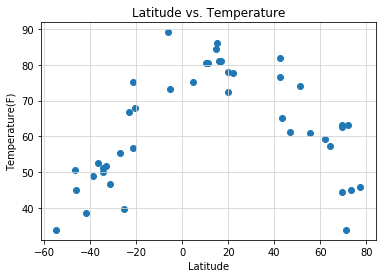

In [13]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Temp"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(b=True, which="major",axis="both", color="lightgrey")
plt.savefig("Images/plot1.png")
plt.show()

In [ ]:
# Analysis: Countries closer to the equator tend to have higher temperatures.

## Latitude vs. Humidity Plot

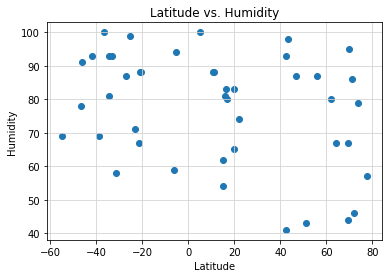

In [14]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which="major",axis="both", color="lightgrey")
plt.savefig("Images/plot2.png")
plt.show()

In [ ]:
# Analysis: There doesn't seem to be a strong correlation between Latitude and Humidity

## Latitude vs. Cloudiness Plot

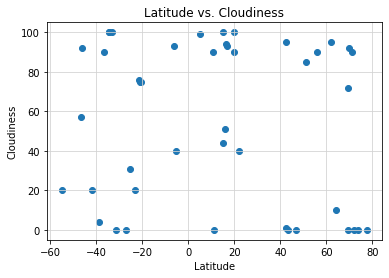

In [15]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True, which="major",axis="both", color="lightgrey")
plt.savefig("Images/plot3.png")
plt.show()

In [ ]:
# Analysis: There doesn't seem to be a strong correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

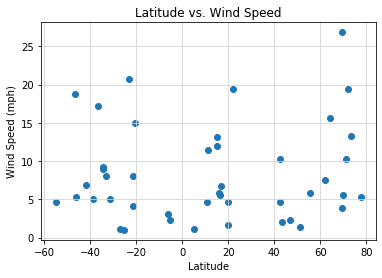

In [16]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed (mph)"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major",axis="both", color="lightgrey")
plt.savefig("Images/plot4.png")
plt.show()

In [ ]:
# Analysis: There doesnt seem to be a strong correlation between latitude and wind speed

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression(x_axis, y_axis, title, x_label, y_label, chart_path):
    slope, y_int, r, pval, stderr = linregress(x_axis, y_axis)
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(b=True, which="major",axis="both", color="lightgrey")
    regression = slope * x_axis + y_int
    plt.plot(x_axis, regression, color = "red")
    plt.savefig(chart_path)
    plt.show()
    

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_df.loc[(clean_city_df["Lat"]> 0)]
southern_df = clean_city_df.loc[(clean_city_df["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

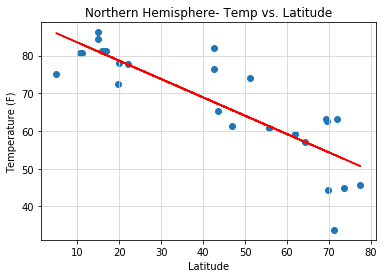

In [19]:
regression(northern_df["Lat"], northern_df["Temp"], "Northern Hemisphere- Temp vs. Latitude", 
           "Latitude", "Temperature (F)", "Images/Plot5.png" )

In [ ]:
# Analysis: This model shows a negative correlation between temperature and latitude in the norther temperature. As the latitude increases, the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

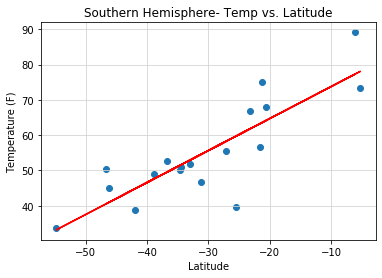

In [20]:
regression(southern_df["Lat"], southern_df["Temp"], "Southern Hemisphere- Temp vs. Latitude", 
           "Latitude", "Temperature (F)", "Images/Plot6.png" )

In [ ]:
# Analysis: This shows a correlation between latitude and temperature in the southern hemisphere, as the latitude gets larger, the temperature decreases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

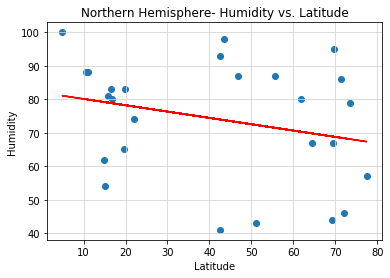

In [21]:
regression(northern_df["Lat"], northern_df["Humidity"], "Northern Hemisphere- Humidity vs. Latitude", 
           "Latitude", "Humidity", "Images/Plot7.png" )

In [ ]:
# Analysis: There is a weak correlation between humidity and latitude, slightly so that as latitude increases, humidity decreases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

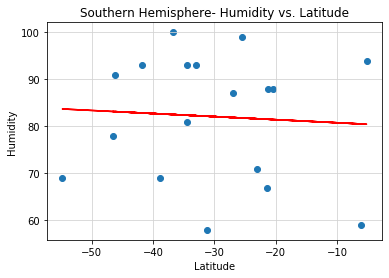

In [22]:
regression(southern_df["Lat"], southern_df["Humidity"], "Southern Hemisphere- Humidity vs. Latitude", 
           "Latitude", "Humidity", "Images/Plot8.png" )

In [ ]:
# Analysis: There is a weak correlation between humidity and latitude in the Southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

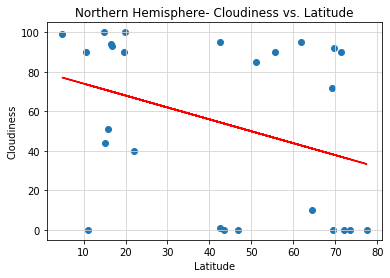

In [23]:
regression(northern_df["Lat"], northern_df["Cloudiness"], "Northern Hemisphere- Cloudiness vs. Latitude", 
           "Latitude", "Cloudiness", "Images/Plot9.png" )

In [ ]:
# Analysis: In the nothern hemisphere, there is a slight correlation between cloudiness and latitude. As the latitude increases, cloudiness decreases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

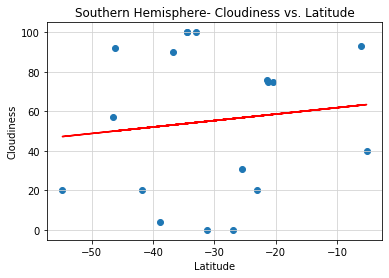

In [24]:
regression(southern_df["Lat"], southern_df["Cloudiness"], "Southern Hemisphere- Cloudiness vs. Latitude", 
           "Latitude", "Cloudiness", "Images/Plot10.png" )

In [ ]:
# Analysis: There is a slight correlation in the southern hemisphere between cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

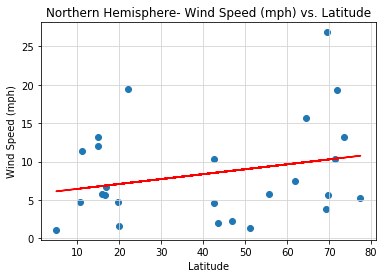

In [25]:
regression(northern_df["Lat"], northern_df["Wind Speed (mph)"], "Northern Hemisphere- Wind Speed (mph) vs. Latitude", 
           "Latitude", "Wind Speed (mph)", "Images/Plot11.png" )

In [ ]:
# Analysis: In the northern hemisphere, as latidude increases, wind speed increases.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

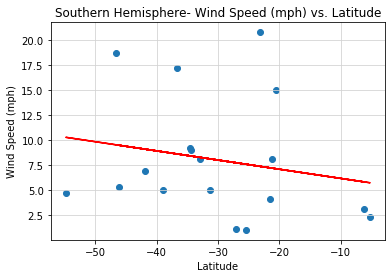

In [26]:
regression(southern_df["Lat"], southern_df["Wind Speed (mph)"], "Southern Hemisphere- Wind Speed (mph) vs. Latitude", 
           "Latitude", "Wind Speed (mph)", "Images/Plot12.png" )

In [ ]:
# Analysis: In the Southern Hemisphere, as latitude increases, wind speed decreases. 